<H6> In this assignment students have to transform iris data into 3 dimensions 
and plot a 3d chart with transformed dimensions and color each data point with specific class.  </H6>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition 
from sklearn import datasets 
from sklearn.decomposition import PCA

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [12]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcaDf = pd.DataFrame(data = pcs, columns = ['PCA1', 'PCA2', 'PCA3'])

In [13]:
pcaDf

,PCA1,PCA2,PCA3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
5,-2.279897,0.747783,0.174326
6,-2.820891,-0.082105,0.264251
7,-2.626482,0.170405,-0.015802
8,-2.887959,-0.570798,0.027335
9,-2.673845,-0.106692,-0.191533


In [14]:
PCA_DF = pd.concat([pcaDf, df[['target']]], axis = 1)

In [15]:
x_vals = PCA_DF['PCA1']
y_vals = PCA_DF['PCA2']
z_vals = PCA_DF['PCA3']

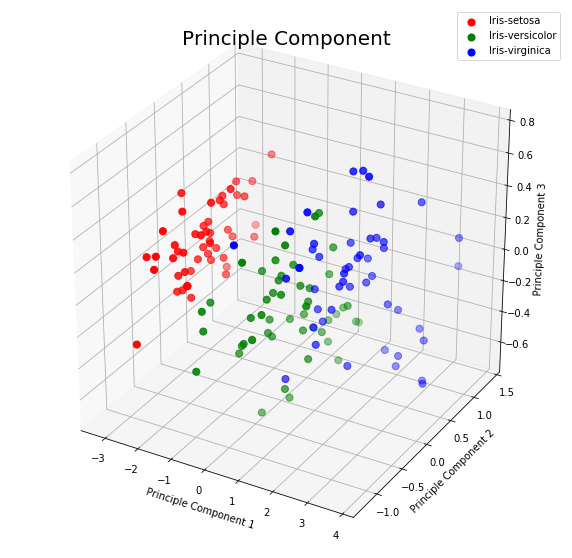

In [30]:
fig = plt.figure(figsize = (10,10))
x = fig.add_subplot(111, projection='3d')
x.set_xlabel(' '*10+' Principle Component 1 ' + ' '*10, fontsize = 10)
x.set_ylabel(' '*10+' Principle Component 2 ' + ' '*10, fontsize = 10)
x.set_zlabel(' '*10+' Principle Component 3 ' + ' '*10, fontsize = 10)
x.set_title('Principle Component', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = PCA_DF['target'] == target
    x.scatter(PCA_DF.loc[indices, 'PCA1']
               , PCA_DF.loc[indices, 'PCA2']
               , PCA_DF.loc[indices, 'PCA3']
               , c = color
               , s = 50)
x.legend(targets)
x.grid()
plt.show()